## Create a histogram to visualize the most common salary ranges for employees.

In [28]:
#Import dependencies 
import sqlalchemy 
import pandas as pd


In [29]:
#Connect to database hw 
from sqlalchemy import create_engine
engine = create_engine('postgresql://***@localhost:5432/hw')
connection = engine.connect()

In [30]:
#Create a specific query 
query = "select * from salaries"

In [31]:
#Pull query to a dataframe 
df = pd.read_sql_query(query, connection)

In [32]:
df

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


Text(0, 0.5, 'Frequency')

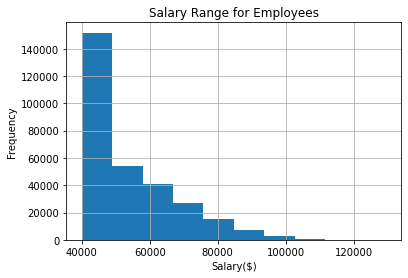

In [36]:
#Create history of salaries 
ax = df.salary.hist()
ax.set_title('Salary Range for Employees')
ax.set_xlabel("Salary($)")
ax.set_ylabel("Frequency")

In [34]:
df.describe()

,emp_no,salary
count,300024.000000,300024.000000
mean,253321.763392,52970.732451
std,161828.235540,14301.478491
min,10001.000000,40000.000000
25%,85006.750000,40000.000000
50%,249987.500000,48681.000000
75%,424993.250000,61758.000000
max,499999.000000,129492.000000
